<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/5-DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/Visualizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Visualización

Recorrido por las diferentes opciones que tenemos a la hora de realizar gráficos. Vamos a usar las librerías [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [Matplotlib](https://matplotlib.org/stable/index.html) y [Plotly](https://plotly.com/) para realizar nuestras visualizaciones.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

## Matplotlib

En este caso, vamos a utilizar Matplotlib para realizar gráficos.

Veremos que cada gráfico de Matplotlib se compone por un objeto del tipo **Figure**, que será donde se grafiquen los datos. Cada figura contiene uno o más ejes, llamados **Axes**. Dentro de estos objetos podremos acceder a métodos y atributos que nos permitirán graficar los datos y configurar nuestros gráficos.

Para entenderlo, vamos a ver un ejemplo con datos numéricos simples.

### Primer acercamiento

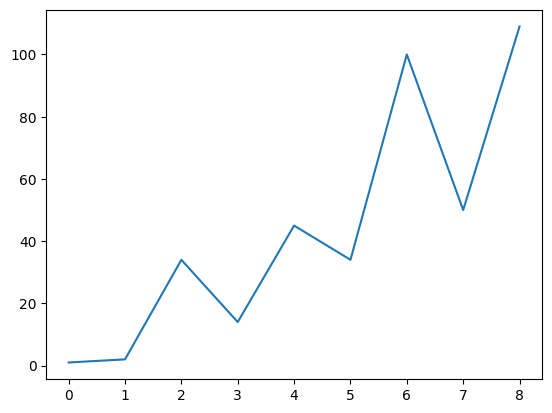

In [ ]:
plt.plot([1,2,34,14,45,34,100,50,109])

### Sumando detalles

Ahora creamos un objeto Figure (fig) y otro Axes (ax). Luego graficamos unas rectas.

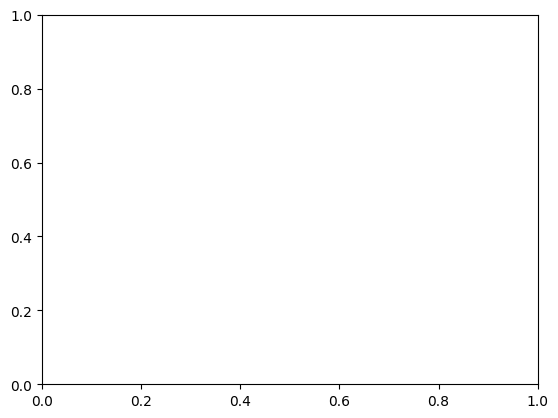

In [ ]:
fig, ax = plt.subplots() #devuelve dos objetos: figura y eje

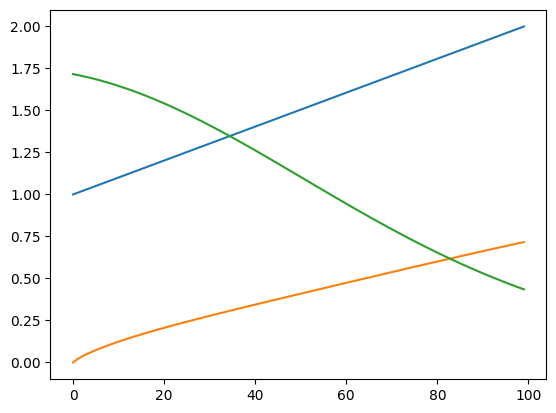

In [ ]:
fig, ax = plt.subplots() #devuelve dos objetos diferentes figura y eje

#creacion de variables
z1 = np.linspace(1, 2, 100) # vector de puntos
z2 = np.log(z1) ** np.sin(z1) # transformacion de z1 (funcion logaritmica elevado al seno de z1)
z3 = np.exp(z1) ** np.cos(z1) # transformacion de z1 (funcion exponencial de z1 elevado al coseno)

#ploteamos sobre el eje
ax.plot(z1)
ax.plot(z2)
ax.plot(z3)

fig.show()

ax es la nomenclatura estandar del eje

Le podemos agregar un título y nombre a los ejes, al igual que etiquetas a cada una de las líneas.

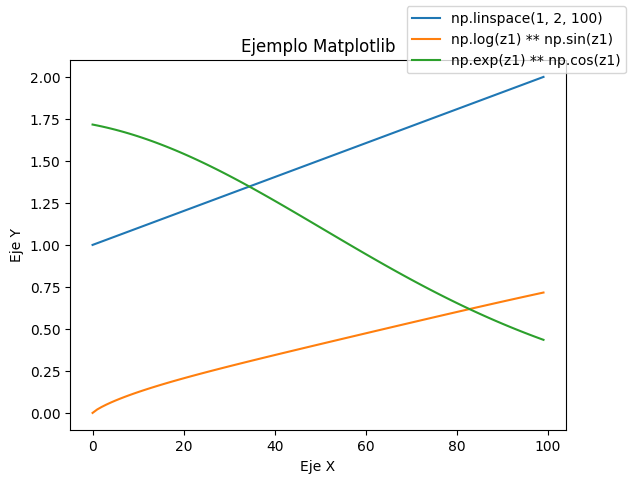

In [ ]:
fig, ax = plt.subplots()

# titulos
ax.set_title('Ejemplo Matplotlib')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# etiquetas
ax.plot(z1, label = 'np.linspace(1, 2, 100)')
ax.plot(z2, label = 'np.log(z1) ** np.sin(z1)')
ax.plot(z3, label = 'np.exp(z1) ** np.cos(z1)')

fig.legend() # para mostrar leyenda
fig.show()

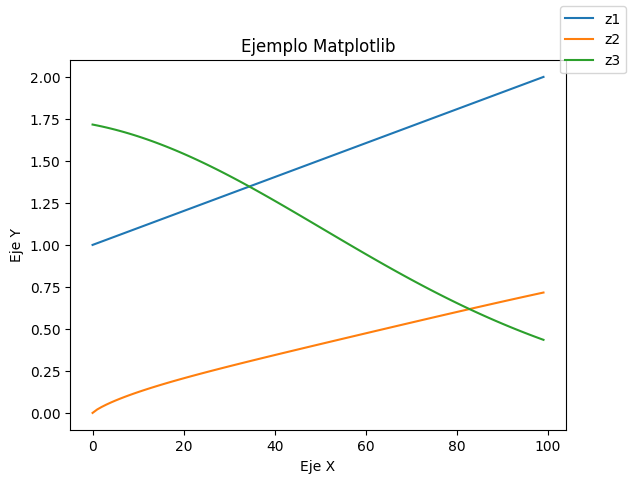

In [ ]:
fig, ax = plt.subplots()

# titulos
ax.set_title('Ejemplo Matplotlib')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# etiquetas
ax.plot(z1, label = 'z1')
ax.plot(z2, label = 'z2')
ax.plot(z3, label = 'z3')

fig.legend() # para mostrar leyenda
fig.show()

Tambien podemos visualizar tres gráficos distintos en una misma figura. De la misma manera se podría configurar cada uno de los ejes.

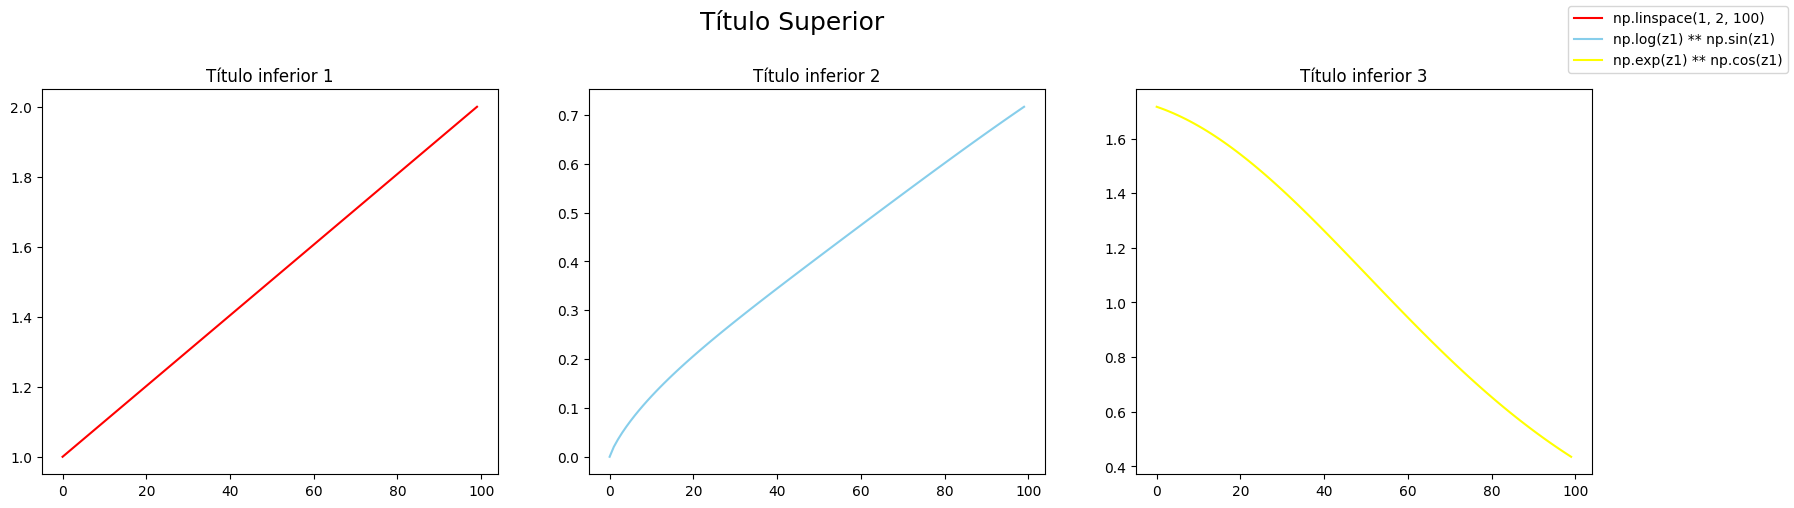

In [ ]:
# figsize tamanio
# ncols numero de graficos
# nrows numero de filas
fig, ax = plt.subplots(figsize = (20,5), ncols=3, nrows=1)

fig.suptitle('Título Superior', fontsize=18, y = 1.04)

# titulo de cada eje (ver que se indexa)
ax[0].set_title('Título inferior 1')
ax[1].set_title('Título inferior 2')
ax[2].set_title('Título inferior 3')

# titulo  y color de variable graficada
ax[0].plot(z1, color='red', label =  'np.linspace(1, 2, 100)') # etiquetas grafico 1 (colores, etiqueta (label))
ax[1].plot(z2, color='skyblue', label = 'np.log(z1) ** np.sin(z1)')
ax[2].plot(z3, color='yellow', label = 'np.exp(z1) ** np.cos(z1)')

fig.legend()
fig.show()

Entonces, ¿cómo podríamos usar datos para hacer gráficos más sofisticados?

## Importación de datos

Ahora sí, antes de continuar con las siguientes librerías, vamos a importar los datos a utilizar:

[Canciones más reproducidas de 2023 en Spotify](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) en Kaggle.


Hay que descargarlo de Kaggle y subirlo al Colab.





Primero, vamos a hacer un poco de preprocesamiento sobre nuestros datos.

In [ ]:
spotify_df = pd.read_csv("/content/spotify-2023.csv", encoding='iso-8859-1')

In [ ]:
spotify_df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
362,Neverita,Bad Bunny,1,2022,5,6,2590,30,671365962,20,...,122,A#,Major,88,43,50,7,0,14,5
828,Music For a Sushi Restaurant,Harry Styles,1,2022,5,20,4449,1,334733572,80,...,107,B,Major,72,36,72,26,6,11,4
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
371,After Hours,The Weeknd,1,2020,2,19,8084,6,698086140,45,...,109,F,Minor,66,16,57,10,1,12,3
452,Holly Jolly Christmas,Michael Bublï¿,1,2011,10,14,7655,0,476244795,5,...,151,G,Major,65,70,47,87,0,9,4


In [ ]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
# nuevo df con todas las filas pero 16 columnas
spotify_df = spotify_df.iloc[:,:17]

In [ ]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode'],
      dtype='object')

In [ ]:
# renombrar columnas
spotify_df.columns=["nombre_cancion", "nombre_artista(s)", "cantidad_artista(s)", "lanzamiento_año", "lanzamiento_mes", "lanzamiento_dia",
                    "en_playlists_spotify", "en_charts_spotify", "reproducciones","en_playlists_apple", "en_charts_apple", "en_playlists_deezer", "en_charts_deezer",
                    "en_charts_shazam", "bpm", "escala", "modo"]

In [ ]:
# reemplazo de palabras dentro de la columna "modo"
spotify_df["modo"] = spotify_df["modo"].replace({"Major": "Mayor", "Minor": "Menor"})

In [ ]:
spotify_df.head()

,nombre_cancion,nombre_artista(s),cantidad_artista(s),lanzamiento_año,lanzamiento_mes,lanzamiento_dia,en_playlists_spotify,en_charts_spotify,reproducciones,en_playlists_apple,en_charts_apple,en_playlists_deezer,en_charts_deezer,en_charts_shazam,bpm,escala,modo
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Mayor
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Mayor
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Mayor
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Mayor
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Menor


charts son podios


Ahora sí podemos empezar a graficar.

## Pandas

### Grafico de torta

El primer gráfico que vamos a realizar es el [polémico](https://www.data-to-viz.com/caveat/pie.html) gráfico de torta.

Si es polémico, ¿por qué lo usamos?

En este caso, vamos a graficar una varible categórica con 2 valores posibles: Menor y Mayor. Este es un [correcto](https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/pie-charts#:~:text=When%20and%20how%20to%20use,other%2C%20forming%20a%20whole%20category.) caso de uso para un gráfico de torta.

In [ ]:
spotify_df["modo"].value_counts()

modo
Mayor    550
Menor    403
Name: count, dtype: int64

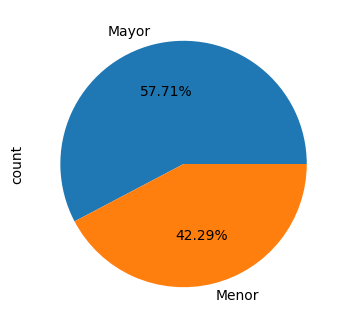

In [ ]:
ax_pie = spotify_df["modo"].value_counts().plot.pie(figsize=(8,4), autopct='%.2f%%')

Text(0.5, 1.0, 'Proporción de canciones en modo mayor y menor')

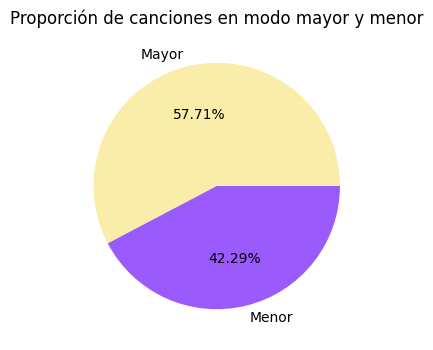

In [ ]:
ax_pie = spotify_df["modo"].value_counts().plot.pie(figsize=(8,4), colors=['#FAEDA9', '#9A5AfC'],
                      autopct='%.2f%%')

ax_pie.set_ylabel("") # sin count
ax_pie.set_title('Proporción de canciones en modo mayor y menor') # seteo de titulo

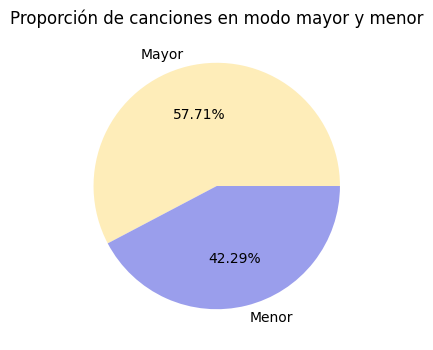

In [ ]:
ax_pie = spotify_df["modo"].value_counts().plot.pie(figsize=(8,4), colors=['#FEEDB9', '#9A9EEC'],
                      autopct='%.2f%%')

ax_pie.set_ylabel("")
ax_pie.set_title('Proporción de canciones en modo mayor y menor')
plt.show()

Ya que estamos, vamos a hablar un poco de qué colores elegir para nuestros gráficos, y sobre [accesibilidad](https://www.color-blindness.com/coblis-color-blindness-simulator/).

### Gráfico de línea

Para hacer un gráfico de línea, podríamos pensar en utilizar el promedio de las reproducciones de las canciones según su año. Me atrevo a pensar que las canciones más reproducidas en Spotify a nivel global suelen ser recientes, pero puedo equivocarme.

Como estamos graficando la tendencia de una variable numérica a través del tiempo, tiene sentido pensar en un gráfico de líneas. Veamos:

In [ ]:
spotify_df.dtypes

nombre_cancion          object
nombre_artista(s)       object
cantidad_artista(s)      int64
lanzamiento_año          int64
lanzamiento_mes          int64
lanzamiento_dia          int64
en_playlists_spotify     int64
en_charts_spotify        int64
reproducciones          object
en_playlists_apple       int64
en_charts_apple          int64
en_playlists_deezer     object
en_charts_deezer         int64
en_charts_shazam        object
bpm                      int64
escala                  object
modo                    object
dtype: object

In [ ]:
spotify_df.reproducciones = pd.to_numeric(spotify_df.reproducciones, errors="coerce") # Algunas filas tienen errores y no tienen números en ese campo

In [ ]:
# agrupamos por los dif. anios de lanzamiento y el promedio de reproducciones
promedio_repr_año = spotify_df.groupby(by="lanzamiento_año")["reproducciones"].mean()
promedio_repr_año.tail()

lanzamiento_año
2019    1.051970e+09
2020    9.379387e+08
2021    6.202362e+08
2022    2.895582e+08
2023    1.474771e+08
Name: reproducciones, dtype: float64

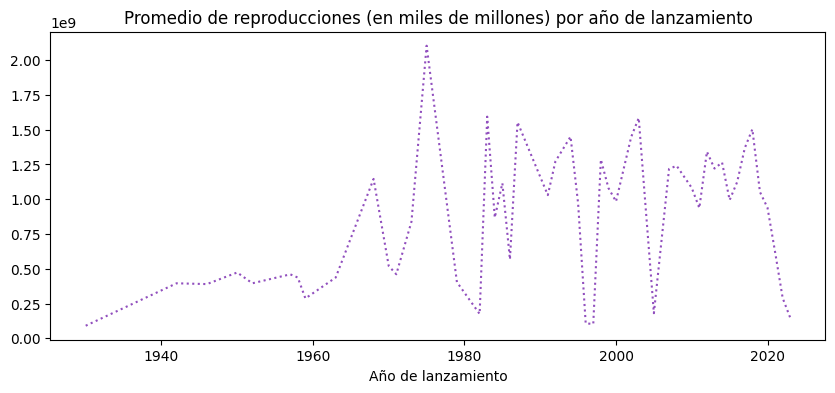

In [ ]:
ax_line = promedio_repr_año.plot.line(figsize=(10,4), color='#914fbe', ls=":") #  grafico de lineas (tamanio, color y puntos)
ax_line.set_title("Promedio de reproducciones (en miles de millones) por año de lanzamiento") # titulo
ax_line.set_xlabel("Año de lanzamiento") # etiqueta eje x
plt.show() # show

Aquí vemos 2 cosas interesantes:

Primero, las caídas repentinas que vemos en ciertos años se deben a que tenemos un valor al año y algunos valores altos son seguidos por otros bajos, y así sucesivamente, generando este artefacto.

Por otro lado, ¿qué representa ese pico que vemos alrededor de los años 70?

In [ ]:
# identificamos el indice maximo
spotify_df[spotify_df["lanzamiento_año"] == promedio_repr_año.idxmax()]

,nombre_cancion,nombre_artista(s),cantidad_artista(s),lanzamiento_año,lanzamiento_mes,lanzamiento_dia,en_playlists_spotify,en_charts_spotify,reproducciones,en_playlists_apple,en_charts_apple,en_playlists_deezer,en_charts_deezer,en_charts_shazam,bpm,escala,modo
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2.009095e+09,300,65,"1,003",1,0,102,C#,Mayor
717,Bohemian Rhapsody - Remastered 2011,Queen,1,1975,10,31,40112,3,2.197011e+09,321,162,"5,691",8,17,71,NaN,Menor


**logicamente el promedio de 1975 es alto, porque solo hay dos canciones de ese anio de lanzamiento**

Como vemos, el hecho de que en este dataset haya 2 canciones de 1975, y ambas con muchas reproducciones, nos da la impresión de que en ese año se condensaron muchas reproducciones. Esta información es interesante, pero sigo con mi teoría de que la música más reproducida es reciente...

Vamos a intentar comprobarlo haciendo un gráfico de la suma de reproducciones, en vez del promedio.

In [ ]:
# suma de las reproducciones por lanzamiento_año
suma_repr_año = spotify_df.groupby(by="lanzamiento_año")["reproducciones"].sum()
suma_repr_año.tail()

lanzamiento_año
2019    3.787093e+10
2020    3.470373e+10
2021    7.380810e+10
2022    1.164024e+11
2023    2.580848e+10
Name: reproducciones, dtype: float64

**para hacer un analisis diferente, analizamos la SUMA de reproducciones por anios de lanzamiento, no el promedio**

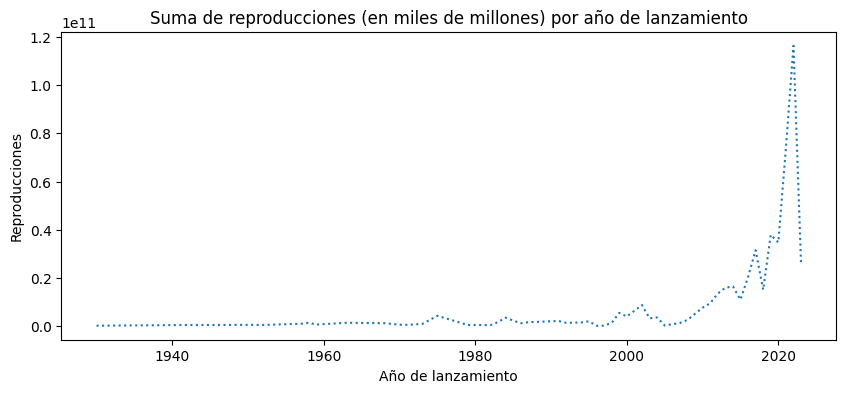

In [ ]:
ax_line = suma_repr_año.plot.line(figsize=(10,4), ls=":")
ax_line.set_title("Suma de reproducciones (en miles de millones) por año de lanzamiento")
ax_line.set_ylabel("Reproducciones")
ax_line.set_xlabel("Año de lanzamiento")
plt.show()

Efectivamente, observamos el pico que vimos antes en el 75 (¡gracias Queen!) pero la tendencia pareciera ser escuchar canciones más actuales.

### Gráfico de barras


Ya que hablamos de Queen, vamos a hacer foco en los artistas.

Queremos averiguar quiénes son los artistas que la gente guarda más en sus playlists.

In [ ]:
spotify_df['nombre_artista(s)'].value_counts().head(10)

nombre_artista(s)
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

In [ ]:
# si la fila de la columna 'nombre_artista(s)' pertenece a ["The Weeknd", "Taylor Swift", "Bad Bunny"]
artistas_mas_canciones = spotify_df[spotify_df['nombre_artista(s)'].isin(["The Weeknd", "Taylor Swift", "Bad Bunny"])]


# agrupamiento por bad bunny, taylor, the weeknd. Aplicanod la suma de cuantas veces aparecen en playlists.
cantidad_playlists = artistas_mas_canciones.groupby("nombre_artista(s)")["en_playlists_spotify"].sum()

cantidad_playlists

nombre_artista(s)
Bad Bunny        51317
Taylor Swift    132974
The Weeknd      144053
Name: en_playlists_spotify, dtype: int64

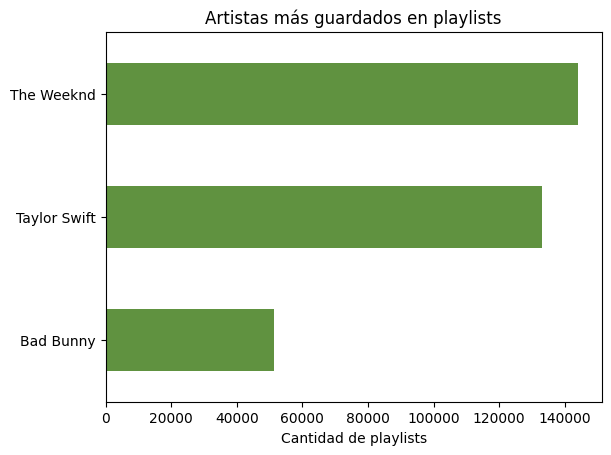

In [ ]:
ax_barh = cantidad_playlists.plot.barh(title = "Artistas más guardados en playlists",
                                       ylabel = "",
                                       xlabel = "Cantidad de playlists",
                                       color = "#609240")
plt.show()

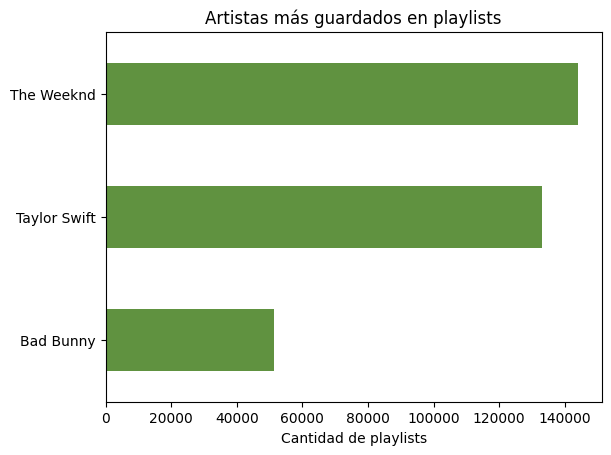

In [ ]:
ax_barh = cantidad_playlists.plot.barh(title = "Artistas más guardados en playlists",
                                       ylabel = "",
                                       xlabel = "Cantidad de playlists",
                                       color = "#609240")
plt.show()

En el ejemplo de recién, al hacer un value_counts la artista con más canciones en este dataset es Taylor Swift. Sin embargo, el artista más guardado en playlists de Spotify es The Weeknd.

### Histograma

Ahora es el turno de hacer un histograma. Tengan cuidado de no confundirlo con un gráfico de barras. Son similares pero [diferentes](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts).

En este ejemplo, imaginemos que nos interesa entender el BPM (PPM en español).
Esta medida nos da noción del ritmo, ciertos géneros tienen BPMs usuales.

Como estamos graficando la frecuencia de apariciones de una variable numérica con un rango amplio, podríamos pensar en visualizar con un histograma.

**PPM, pulsaciones por minuto**

**PPM esta expresado como una variable numerica, podriamos usar un histograma para anlizar su distrubucion normal, viendo la frecuencia de apariciones de cada valor dentro del rango**

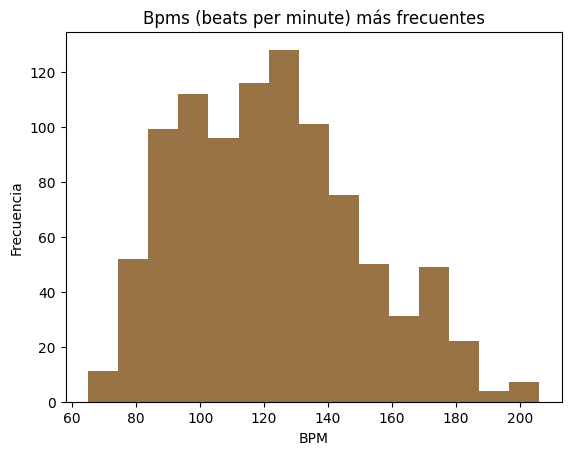

In [ ]:
ax_hist = spotify_df["bpm"].plot.hist(bins = 15, color = "#987345")
# bins (tachos) de 15, signfica el espacio (de 185 a 200 ppm)
ax_hist.set_title("Bpms (beats per minute) más frecuentes")
ax_hist.set_ylabel("Frecuencia")
ax_hist.set_xlabel("BPM")
plt.show()

**los bins son tachos, espacios que almacenan los valores numericos (ej: del 100 al 120)**

Aparentemente, hay rangos de BPM que tienen más frecuencia de aparición que otros.

En [este enlace](https://learningmusic.ableton.com/es/make-beats/tempo-and-genre.html) podemos jugar con los distintos BPMs y entender cómo afectan a la música que escuchamos. También hay ejemplos de los rangos de BPM más usuales según el género.

### Gráfico de caja

El caso de uso de un *boxplot* o gráfico de caja es muy similar al del histograma.

Para hablar de sus similitudes y diferencias, vamos a volver a graficar el BPM.

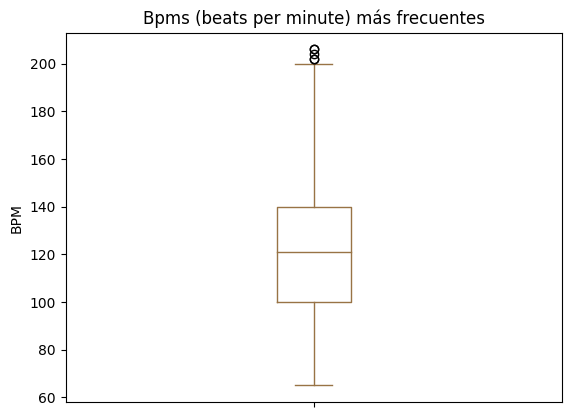

In [ ]:
ax_box = spotify_df["bpm"].plot.box(color = "#987345")
ax_box.set_title("Bpms (beats per minute) más frecuentes")
ax_box.set_ylabel("BPM")
ax_box.set_xticklabels([]) # para quitar label eje X
plt.show()

Recordemos que dentro de la caja se encuentra el 50% de la población. La línea dentro de la caja indica la mediana.

Si bien un *boxplot* nos da una mejor noción de ciertos valores estadísticos, también se modifica lo que percibimos. Por ejemplo, en este gráfico podríamos pensar que hay pocas canciones por debajo de 100 BPM, y al volver al histograma vemos que no es así.

### Gráfico de dispersión

Ahora vamos a ver un gráfico de dispersión o *scatterplot*.

En el inicio de este Colab, descartamos algunas columnas que brindaban porcentajes de bailabilidad, energía, acústica, etc. porque no íbamos a usarlas.
¿Qué pasa si tratamos de entenderlas?

Nuestra primera idea es que tal vez se relacione justamente con el BPM.

In [ ]:
spotify_songfeatures_df = pd.read_csv("/content/spotify-2023.csv",encoding='iso-8859-1').iloc[:,14:]
spotify_songfeatures_df.head()

,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,125,B,Major,80,89,83,31,0,8,4
1,92,C#,Major,71,61,74,7,0,10,4
2,138,F,Major,51,32,53,17,0,31,6
3,170,A,Major,55,58,72,11,0,11,15
4,144,A,Minor,65,23,80,14,63,11,6


Vamos a hacer un primer gráfico de dispersión de cada una de estas columnas en función del BPM. No se preocupen por la estética ahora, es exploratorio.

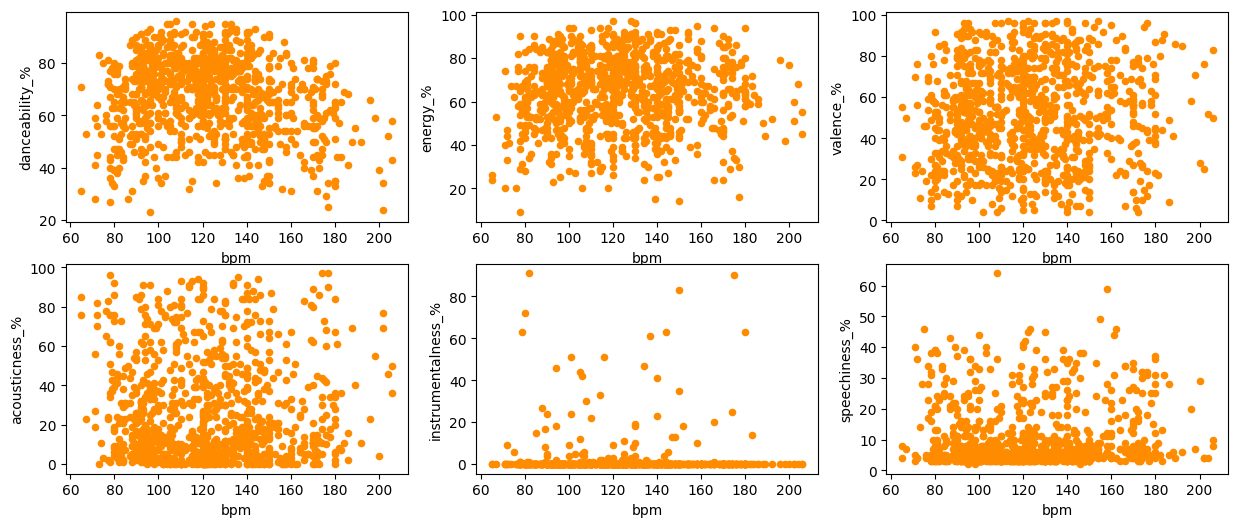

In [ ]:
# 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

spotify_songfeatures_df.plot.scatter(x="bpm", y="danceability_%", ax=axes[0][0], c="darkorange")
spotify_songfeatures_df.plot.scatter(x="bpm", y="energy_%",ax=axes[0][1], c="darkorange")
spotify_songfeatures_df.plot.scatter(x="bpm", y="valence_%",ax=axes[0][2], c="darkorange")
spotify_songfeatures_df.plot.scatter(x="bpm", y="acousticness_%",ax=axes[1][0], c="darkorange")
spotify_songfeatures_df.plot.scatter(x="bpm", y="instrumentalness_%",ax=axes[1][1], c="darkorange")
spotify_songfeatures_df.plot.scatter(x="bpm", y="speechiness_%",ax=axes[1][2], c="darkorange")

plt.show()

No encuentro demasiadas conclusiones, salvo la baja instrumentalidad en general. ¿Seguimos explorando este tópico? ¡Mejor vayamos a Plotly!

## Plotly

En esta sección utilizaremos la librería [Plotly](https://plotly.com/) para realizar gráficos interactivos.

### Gráfico de dispersión

Vamos a seguir iterando sobre nuestro gráfico de dispersión de las variables de bailabilidad, acústica, etc. Ahora, queremos ver cómo se relacionan entre sí.

Para eso, vamos a tomar las variables de bailabilidad, energía y valencia. Según la documentación, la valencia es una medida de 0 a 100 que mide el porcentaje de positividad de las letras.

In [ ]:
spotify_songfeatures_df.head()

,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,125,B,Major,80,89,83,31,0,8,4
1,92,C#,Major,71,61,74,7,0,10,4
2,138,F,Major,51,32,53,17,0,31,6
3,170,A,Major,55,58,72,11,0,11,15
4,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
fig = px.scatter(spotify_songfeatures_df,
                 x = "energy_%",
                 y = "danceability_%",
                 color = "valence_%",
                 width =800, height = 400) # ancho y alto

# configuracion de etiquetas
fig.update_xaxes(title_text = "Energia")
fig.update_yaxes(title_text = "Bailabilidad")
fig.update_coloraxes(colorbar_title = "Positividad")


fig.show()

**insight: Correlacion positiva. A mayor  porcentaje de energia y Bailabilidad, mayor positividad.**

Según este gráfico, pareciera ser que las canciones con más energía y más bailables tienen también letras más positivas. ¡Se me ocurren varios ejemplos!

¿Qué pasaría si hiciéramos lo mismo pero graficando el % de acústico? ¡Prueben hacerlo!

In [ ]:
fig1 = px.scatter(spotify_songfeatures_df,
                 x = "energy_%",
                 y = "danceability_%",
                 color = "acousticness_%",
                 width =800, height = 400)

fig1.show()

**insight: correlacion negativa. A mayor acustica de la cancion, menor es la energia y bailabilidad de la cancion**

### Gráfico de barras

Para finalizar, vamos a hacer un gráfico de barras.

De las canciones más escuchadas en 2023, ¿cuántas se lanzaron en cada mes?
Como estamos evaluando una tendencia actual, tomaremos solo 2022 y 2023, ya que el dataset aún no está completo para 2023 hasta diciembre inclusive.

En este caso, tuvimos un debate sobre si usar un gráfico de barras o líneas, y les contaré por qué al ver el gráfico.

In [ ]:
spotify_df.head()

,nombre_cancion,nombre_artista(s),cantidad_artista(s),lanzamiento_año,lanzamiento_mes,lanzamiento_dia,en_playlists_spotify,en_charts_spotify,reproducciones,en_playlists_apple,en_charts_apple,en_playlists_deezer,en_charts_deezer,en_charts_shazam,bpm,escala,modo
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Mayor
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Mayor
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Mayor
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125,12,548,170,A,Mayor
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Menor


In [ ]:
# df que sea por anio de lanzamiento 2022/23
spotify_2022_2023 = spotify_df[(spotify_df["lanzamiento_año"] == 2022) | (spotify_df["lanzamiento_año"] == 2023)]

canciones_por_mes = spotify_2022_2023.groupby(["lanzamiento_año", "lanzamiento_mes"])["nombre_artista(s)"].size().reset_index(name='cantidad_canciones')
canciones_por_mes

# size(): mide el tamanio resultante de cada subgrupo resultante de usar groupby
# name='cantidad_canciones' establece el nombre de la nueva columna que contiene los recuentos calculados por size()

,lanzamiento_año,lanzamiento_mes,cantidad_canciones
0,2022,1,37
1,2022,2,28
2,2022,3,27
3,2022,4,30
4,2022,5,75
5,2022,6,29
6,2022,7,26
7,2022,8,19
8,2022,9,20
9,2022,10,37


In [ ]:
fig = px.bar(data_frame = canciones_por_mes,
             x = 'lanzamiento_mes',
             y = 'cantidad_canciones',
             title = "Lanzamientos por mes")

fig.update_layout(
    xaxis_title = "Mes de lanzamiento",
    yaxis_title = "Cantidad de canciones")

fig.show()

¿Qué sucede después de junio que hay una caída repentina?

In [ ]:
# para el 2023, cual es el lanzamiento_mes maximo?
spotify_df[spotify_df['lanzamiento_año'] == 2023]['lanzamiento_mes'].max()

7

Exacto, ¡es hasta donde llega nuestro dataset en 2023! Y tampoco sabemos si toma julio completo.

Siempre es importante verificar contexto y, si es muy importante, agregarlo al gráfico. En este caso, no agregarlo haría parecer que después de junio hubo una gran caída.

In [ ]:
fig = px.bar(data_frame = canciones_por_mes,
             x = 'lanzamiento_mes',
             y = 'cantidad_canciones',
             title = "Lanzamientos por mes")

fig.update_layout(
    xaxis_title = "Mes de lanzamiento",
    yaxis_title = "Cantidad de canciones")

fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=7,
        x1=7,
        y0=0,
        y1=107,
        line=dict(
            color="black",
            width=2,
            dash="dash",
        )
    )
)


fig.add_annotation(
    go.layout.Annotation(
        text="Hasta aquí llega 2023",
        x=7,
        y=110,
        showarrow=False
    )
)

fig.show()

Hasta ahora no nos habíamos preocupado mucho por la estética, pero ahora vamos a personalizarlo más.
De paso, vamos a probar una paleta de colores accesible para daltonismo.

In [ ]:
fig = px.bar(
    canciones_por_mes,
    x='lanzamiento_mes',
    y='cantidad_canciones',
    color='lanzamiento_año',
    color_continuous_scale=px.colors.sequential.Cividis,
    labels={'cantidad_canciones': 'Cantidad de Canciones', 'lanzamiento_mes': 'Mes', 'lanzamiento_año': 'Año'},
    title='Lanzamientos por mes',
    template='plotly_white'
)

fig.update_layout(
    title_font=dict(size=25),
    font=dict(color="#000", family="helvetica"),
    xaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5, title='Mes'),
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5, title='Cantidad de Canciones'),
    coloraxis_showscale=False,  # Para esconder el gradiente de lanzamiento_año
    title=dict(text='Lanzamientos por mes', x=0.5),  # Para centrar el título
)

fig.update_traces(hovertemplate='Mes de lanzamiento: %{x}<br>Canciones lanzadas: %{y}<br>Año: %{marker.color}')

fig.show()

También les dejo el código para hacer el mismo gráfico en Plotly Graph Objects:

In [ ]:
fig = go.Figure(data = [
    go.Bar(
        x = canciones_por_mes['lanzamiento_mes'],
        y = canciones_por_mes['cantidad_canciones'],
        marker = dict(color = canciones_por_mes['lanzamiento_año'], colorscale = px.colors.sequential.Cividis),
        name = ""
    )
])

fig.update_layout(
    title='Lanzamientos por mes',
    xaxis=dict(title='Mes', showgrid=True, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(title='Cantidad de Canciones', showgrid=True, gridcolor='lightgray', gridwidth=0.5),
    title_x=0.5,
    title_font=dict(size=25),
    font=dict(color="#000", family="helvetica"),
    plot_bgcolor="#FFF",
)

fig.update_traces(hovertemplate='Mes de lanzamiento: %{x}<br>Canciones lanzadas: %{y}<br>Año: %{marker.color}')

fig.show()

¡Y eso es todo sobre gráficos!

Recuerden pensar para qué es el gráfico, quién lo va a ver y cuál es la visualización correcta para lo que estén queriendo mostrar.